# Exercise 1: Privacy-preserving Synthetic Data Generation

Install the Data Synthesizer library.

In [2]:
# Adding current direcotry into sys.path
import os, sys
sys.path.append(os.getcwd() + '/DataSynthesizer/DataSynthesizer')

In [3]:
from DataDescriber import DataDescriber
from DataGenerator import DataGenerator
from ModelInspector import ModelInspector
from lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [4]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']
    
    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [5]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']
    
    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [6]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)
    
    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [18]:
real_data_file = './hw_compas.csv'
fake_data_file = './hw_fake.csv'
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

os.mkdir('./out')
description_files = {'A': './out/descrption_A.json', 
                     'B': './out/descrption_B.json', 
                     'C': './out/descrption_C.json', 
                     'D': './out/descrption_D.json'}

df_real = pd.read_csv(real_data_file)
df_fake = pd.read_csv(fake_data_file)

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Goal 1

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [19]:
df_q1_1 = pd.DataFrame()
df_q1_1['hw_compas'] = df_real.median(numeric_only=True)
df_q1_1['A'] = df_real_A.median(numeric_only=True)
df_q1_1['B'] = df_real_B.median(numeric_only=True)
df_q1_1['C'] = df_real_C.median(numeric_only=True)
df_q1_1['D'] = df_real_D.median(numeric_only=True)
df_q1_1.insert(loc=0, column='measure', value=['median'] * df_q1_1.shape[0])

df_q1_2 = pd.DataFrame()
df_q1_2['hw_compas'] = df_real.mean(numeric_only=True)
df_q1_2['A'] = df_real_A.mean(numeric_only=True)
df_q1_2['B'] = df_real_B.mean(numeric_only=True)
df_q1_2['C'] = df_real_C.mean(numeric_only=True)
df_q1_2['D'] = df_real_D.mean(numeric_only=True)
df_q1_2.insert(loc=0, column='measure', value=['mean'] * df_q1_2.shape[0])

df_q1_3 = pd.DataFrame()
df_q1_3['hw_compas'] = df_real.min(numeric_only=True)
df_q1_3['A'] = df_real_A.min(numeric_only=True)
df_q1_3['B'] = df_real_B.min(numeric_only=True)
df_q1_3['C'] = df_real_C.min(numeric_only=True)
df_q1_3['D'] = df_real_D.min(numeric_only=True)
df_q1_3.insert(loc=0, column='measure', value=['min'] * df_q1_3.shape[0])

df_q1_4 = pd.DataFrame()
df_q1_4['hw_compas'] = df_real.max(numeric_only=True)
df_q1_4['A'] = df_real_A.max(numeric_only=True)
df_q1_4['B'] = df_real_B.max(numeric_only=True)
df_q1_4['C'] = df_real_C.max(numeric_only=True)
df_q1_4['D'] = df_real_D.max(numeric_only=True)
df_q1_4.insert(loc=0, column='measure', value=['max'] * df_q1_4.shape[0])

df_q1 = pd.concat([df_q1_1, df_q1_2, df_q1_3, df_q1_4])
df_q1.groupby([df_q1.index, 'measure']).first()

hw_compas         A        B        C        D
      measure                                                
age   max      96.000000  100.0000  76.0000  94.0000  95.0000
      mean     35.143319   50.1731  35.7354  35.0207  35.1191
      median   32.000000   51.0000  33.0000  32.0000  32.0000
      min      18.000000    0.0000  18.0000  18.0000  18.0000
score max      10.000000   10.0000  10.0000  10.0000  10.0000
      mean      4.371268    4.9392   4.3657   4.3823   4.3745
      median    4.000000    5.0000   4.0000   4.0000   4.0000
      min      -1.000000   -1.0000   1.0000  -1.0000  -1.0000

### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

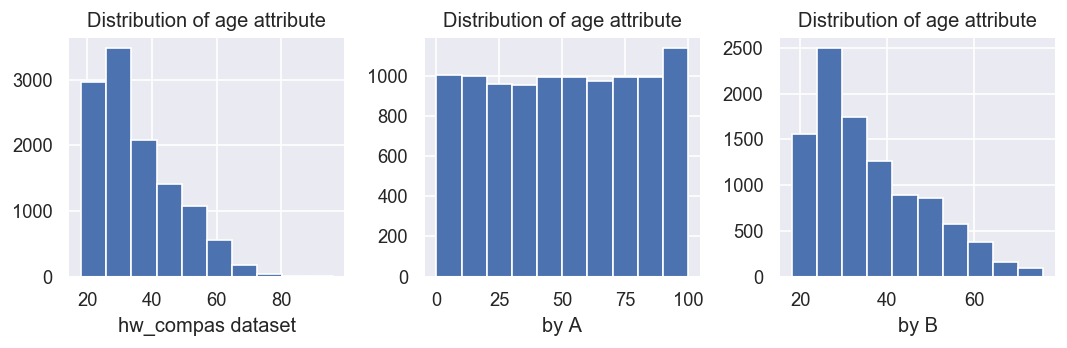

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(9,3), dpi=120)
axes[0].hist(df_real['age'])
axes[1].hist(df_real_A['age'])
axes[2].hist(df_real_B['age'])
axes[0].set_xlabel('hw_compas dataset')
axes[1].set_xlabel('by A')
axes[2].set_xlabel('by B')
axes[0].set_title('Distribution of age attribute')
axes[1].set_title('Distribution of age attribute')
axes[2].set_title('Distribution of age attribute')
plt.tight_layout()

In [21]:
def get_barplot_data(values: pd.Series):
    counts = values.value_counts()
    values = counts.index.tolist()
    counts = counts.tolist()
    return values, counts

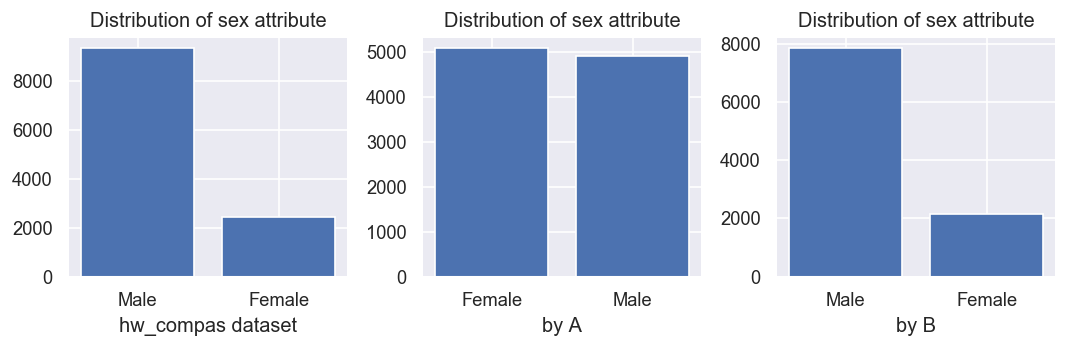

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(9,3), dpi=120)
axes[0].bar(*get_barplot_data(df_real['sex']))
axes[1].bar(*get_barplot_data(df_real_A['sex']))
axes[2].bar(*get_barplot_data(df_real_B['sex']))
axes[0].set_xlabel('hw_compas dataset')
axes[1].set_xlabel('by A')
axes[2].set_xlabel('by B')
axes[0].set_title('Distribution of sex attribute')
axes[1].set_title('Distribution of sex attribute')
axes[2].set_title('Distribution of sex attribute')
plt.tight_layout()

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [23]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

In [24]:
ks_1 = ks_test(df_real, df_real_A, 'age')
ks_2 = ks_test(df_real, df_real_B, 'age')
print(f"KS-test(real, A) over age: {ks_1} \nKS-test(real, B) over age: {ks_2}")

KS-test(real, A) over age: 0.3735091775112699 
KS-test(real, B) over age: 0.026252445351705345


#### KL-divergence for categorical attributes

In [25]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [26]:
kl_1 = kl_test(df_real, df_real_A, 'sex')
kl_2 = kl_test(df_real, df_real_B, 'sex')
print(f"KL-divergence(real, A) over sex: {kl_1} \nKL-divergence(real, B) over sex: {kl_2}")

KL-divergence(real, A) over sex: 0.22319792405369002 
KL-divergence(real, B) over sex: 0.0002494300869420041


### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

In [27]:
mi_fake = pairwise_attributes_mutual_information(df_fake)
mi_fake_C = pairwise_attributes_mutual_information(df_fake_C)
mi_fake_D = pairwise_attributes_mutual_information(df_fake_D)

In [28]:
mi_fake

,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.211242,0.214345,0.195899
child_2,0.211242,1.000000,0.208301,0.200690
parent_1,0.214345,0.208301,1.000000,0.002421
parent_2,0.195899,0.200690,0.002421,1.000000


In [29]:
mi_fake_C

,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.045297,0.000851,0.195337
child_2,0.045297,1.000000,0.000768,0.204595
parent_1,0.000851,0.000768,1.000000,0.003526
parent_2,0.195337,0.204595,0.003526,1.000000


In [30]:
mi_fake_D

,child_1,child_2,parent_1,parent_2
child_1,1.000000,0.201430,0.213931,0.191380
child_2,0.201430,1.000000,0.200965,0.202915
parent_1,0.213931,0.200965,1.000000,0.002239
parent_2,0.191380,0.202915,0.002239,1.000000


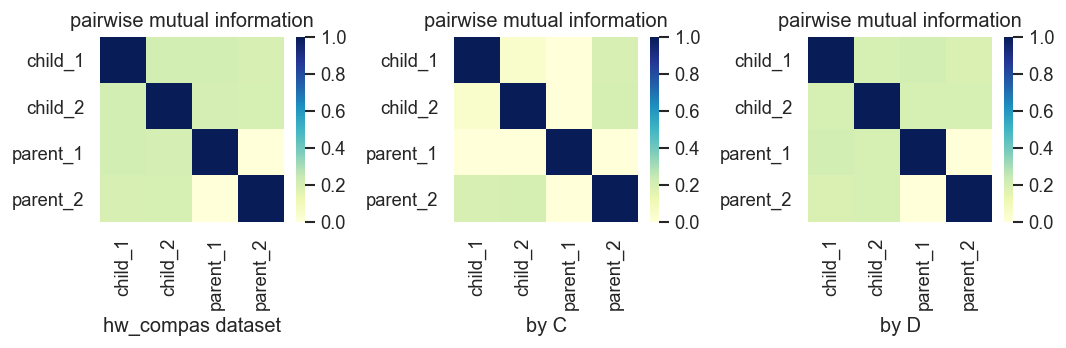

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(9,3), dpi=120)
sns.heatmap(mi_fake, cmap="YlGnBu", vmax=1, vmin=0, ax=axes[0])
sns.heatmap(mi_fake_C, cmap="YlGnBu", vmax=1, vmin=0, ax=axes[1])
sns.heatmap(mi_fake_D, cmap="YlGnBu", vmax=1, vmin=0, ax=axes[2])
axes[0].set_xlabel('hw_compas dataset')
axes[1].set_xlabel('by C')
axes[2].set_xlabel('by D')
axes[0].set_title('pairwise mutual information')
axes[1].set_title('pairwise mutual information')
axes[2].set_title('pairwise mutual information')
plt.tight_layout()

## Goal 2

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [32]:
set_random_seed(seed)

df_goal_2 = pd.DataFrame(columns=['repeat', 'parameter settings', 'measure', 'attribute', 'value'])
for rep in range(10):
    print(f'Running rep={rep}')
    df_A_i = generate_data_A(real_data_file, output_data_size,)
    df_B_i = generate_data_B(real_data_file, output_data_size, epsilon=0.1)
    df_C_i = generate_data_C(real_data_file, output_data_size, epsilon=0.1)
    
    age_min_A = df_A_i['age'].min()
    age_min_B = df_B_i['age'].min()
    age_min_C = df_C_i['age'].min()
    age_max_A = df_A_i['age'].max()
    age_max_B = df_B_i['age'].max()
    age_max_C = df_C_i['age'].max()
    age_mean_A = df_A_i['age'].mean()
    age_mean_B = df_B_i['age'].mean()
    age_mean_C = df_C_i['age'].mean()
    age_median_A = df_A_i['age'].median()
    age_median_B = df_B_i['age'].median()
    age_median_C = df_C_i['age'].median()

    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'A', 'min', 'age', age_min_A]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'B', 'min', 'age', age_min_B]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'C', 'min', 'age', age_min_C]
    
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'A', 'max', 'age', age_max_A]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'B', 'max', 'age', age_max_B]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'C', 'max', 'age', age_max_C]

    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'A', 'mean', 'age', age_mean_A]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'B', 'mean', 'age', age_mean_B]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'C', 'mean', 'age', age_mean_C]

    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'A', 'median', 'age', age_median_A]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'B', 'median', 'age', age_median_B]
    df_goal_2.loc[df_goal_2.shape[0]] = [rep, 'C', 'median', 'age', age_median_C]

df_goal_2['value'] = df_goal_2['value'].astype(float)

clear_output()

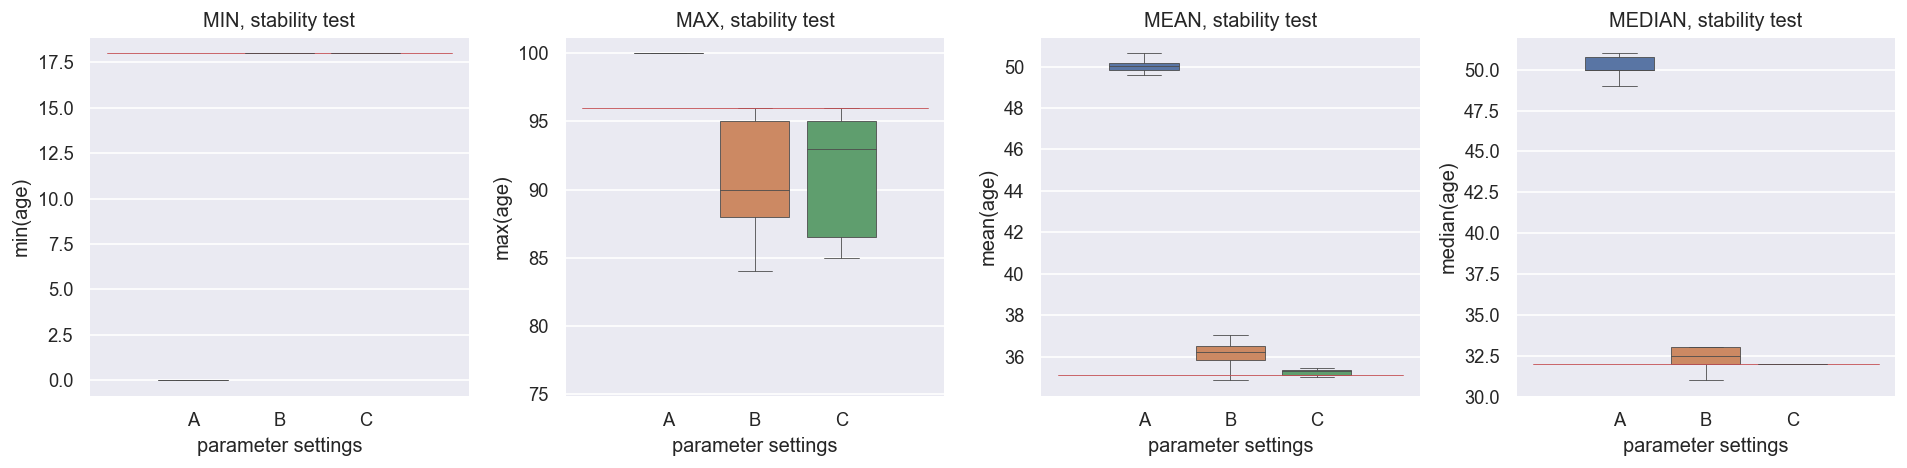

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(16,4), dpi=120)
sns.boxplot(x='parameter settings', y='value', data=df_goal_2[df_goal_2['measure']=='min'], ax=axes[0], linewidth=0.5, fliersize=0)
sns.boxplot(x='parameter settings', y='value', data=df_goal_2[df_goal_2['measure']=='max'], ax=axes[1], linewidth=0.5, fliersize=0)
sns.boxplot(x='parameter settings', y='value', data=df_goal_2[df_goal_2['measure']=='mean'], ax=axes[2], linewidth=0.5, fliersize=0)
sns.boxplot(x='parameter settings', y='value', data=df_goal_2[df_goal_2['measure']=='median'], ax=axes[3], linewidth=0.5, fliersize=0)
axes[0].plot([-1, 3], [df_real['age'].min(), df_real['age'].min()], 'r', linewidth=0.5)
axes[1].plot([-1, 3], [df_real['age'].max(), df_real['age'].max()], 'r', linewidth=0.5)
axes[2].plot([-1, 3], [df_real['age'].mean(), df_real['age'].mean()], 'r', linewidth=0.5)
axes[3].plot([-1, 3], [df_real['age'].median(), df_real['age'].median()], 'r', linewidth=0.5)
axes[0].set_ylabel('min(age)')
axes[1].set_ylabel('max(age)')
axes[2].set_ylabel('mean(age)')
axes[3].set_ylabel('median(age)')
axes[0].set_title('MIN, stability test')
axes[1].set_title('MAX, stability test')
axes[2].set_title('MEAN, stability test')
axes[3].set_title('MEDIAN, stability test')
plt.tight_layout()

## Goal 3

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.1, 0.2, ..., 1].

In [34]:
def mi_diff_acc(df_mi_1, df_mi_2):
    return (df_mi_1 - df_mi_2).abs().sum().sum()/2

In [35]:
set_random_seed(seed)

epsilons_compas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
epsilons_fake = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

repeat = 10

df_goal_3 = pd.DataFrame(columns=['dataset', 'epsilon', 'repeat', 'parameter settings', 'measure', 'value'])

for i, epsilon in enumerate(epsilons_compas):
    print(f'~~~ i={i}, epsilon={epsilon} ~~~')
    for rep in range(repeat):
        df_B_i = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
        df_C_i = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
        df_D_i = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'B', 'KL-divergence', kl_test(df_real, df_B_i, 'race')]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'C', 'KL-divergence', kl_test(df_real, df_C_i, 'race')]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'D', 'KL-divergence', kl_test(df_real, df_D_i, 'race')]

mi_real = pairwise_attributes_mutual_information(df_real)

for i, epsilon in enumerate(epsilons_fake):
    print(f'~~~ i={i}, epsilon={epsilon} ~~~')
    for rep in range(repeat):
        df_B_i = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
        df_C_i = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
        df_D_i = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_fake', epsilon, rep, 'B', 'MI difference', mi_diff_acc(mi_fake, pairwise_attributes_mutual_information(df_B_i))]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_fake', epsilon, rep, 'C', 'MI difference', mi_diff_acc(mi_fake, pairwise_attributes_mutual_information(df_C_i))]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_fake', epsilon, rep, 'D', 'MI difference', mi_diff_acc(mi_fake, pairwise_attributes_mutual_information(df_D_i))]
        
        df_B_i = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
        df_C_i = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
        df_D_i = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'B', 'MI difference', mi_diff_acc(mi_real, pairwise_attributes_mutual_information(df_B_i))]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'C', 'MI difference', mi_diff_acc(mi_real, pairwise_attributes_mutual_information(df_C_i))]
        df_goal_3.loc[df_goal_3.shape[0]] = ['hw_compas', epsilon, rep, 'D', 'MI difference', mi_diff_acc(mi_real, pairwise_attributes_mutual_information(df_D_i))]

clear_output()

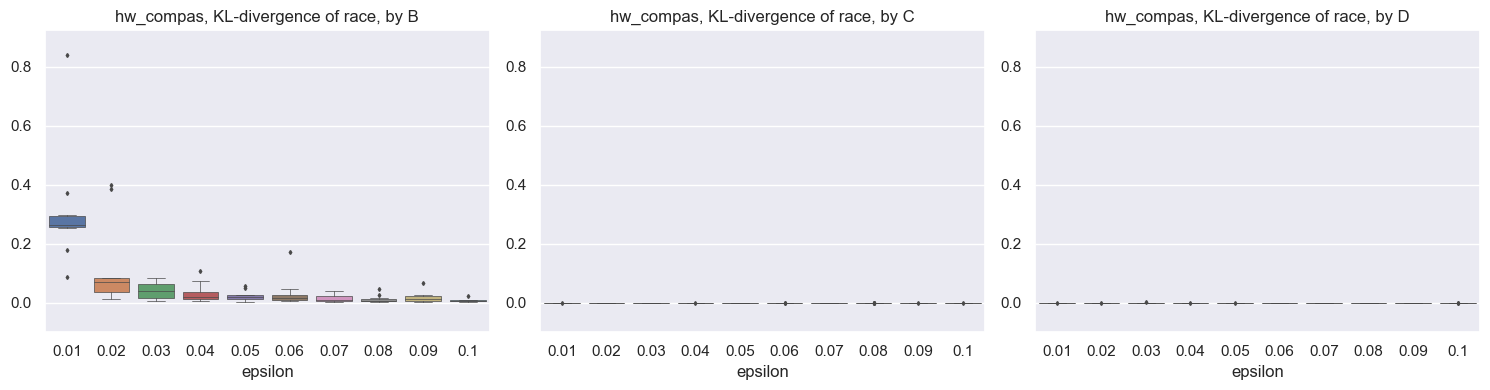

In [36]:
df_kl = df_goal_3[df_goal_3['measure']=='KL-divergence']
maximum = df_kl['value'].max() * 1.1
fig, axes = plt.subplots(1, 3, figsize=(15,4), dpi=100)
sns.boxplot(x='epsilon', y='value', data=df_kl[df_kl['parameter settings']=='B'], ax=axes[0], linewidth=0.5, fliersize=2)
sns.boxplot(x='epsilon', y='value', data=df_kl[df_kl['parameter settings']=='C'], ax=axes[1], linewidth=0.5, fliersize=2)
sns.boxplot(x='epsilon', y='value', data=df_kl[df_kl['parameter settings']=='D'], ax=axes[2], linewidth=0.5, fliersize=2)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_title('hw_compas, KL-divergence of race, by B')
axes[1].set_title('hw_compas, KL-divergence of race, by C')
axes[2].set_title('hw_compas, KL-divergence of race, by D')
axes[0].set_ylim(-0.1, maximum)
axes[1].set_ylim(-0.1, maximum)
axes[2].set_ylim(-0.1, maximum)
plt.tight_layout();

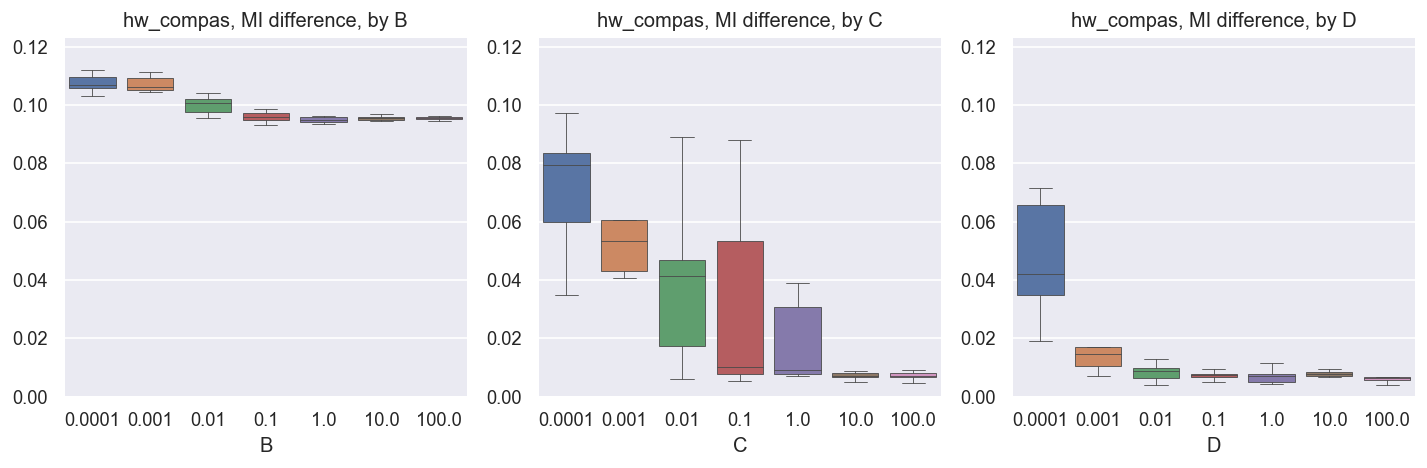

In [37]:
real_mi_diff = df_goal_3[(df_goal_3['dataset']=='hw_compas')&(df_goal_3['measure']=='MI difference')]
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=120)
maximum = real_mi_diff['value'].max() * 1.1
sns.boxplot(x='epsilon', y='value', data=real_mi_diff[real_mi_diff['parameter settings']=='B'], ax=axes[0], linewidth=0.5, fliersize=0)
sns.boxplot(x='epsilon', y='value', data=real_mi_diff[real_mi_diff['parameter settings']=='C'], ax=axes[1], linewidth=0.5, fliersize=0)
sns.boxplot(x='epsilon', y='value', data=real_mi_diff[real_mi_diff['parameter settings']=='D'], ax=axes[2], linewidth=0.5, fliersize=0)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('B')
axes[1].set_xlabel('C')
axes[2].set_xlabel('D')
axes[0].set_title('hw_compas, MI difference, by B')
axes[1].set_title('hw_compas, MI difference, by C')
axes[2].set_title('hw_compas, MI difference, by D')
axes[0].set_ylim(0, maximum)
axes[1].set_ylim(0, maximum)
axes[2].set_ylim(0, maximum)
plt.tight_layout()

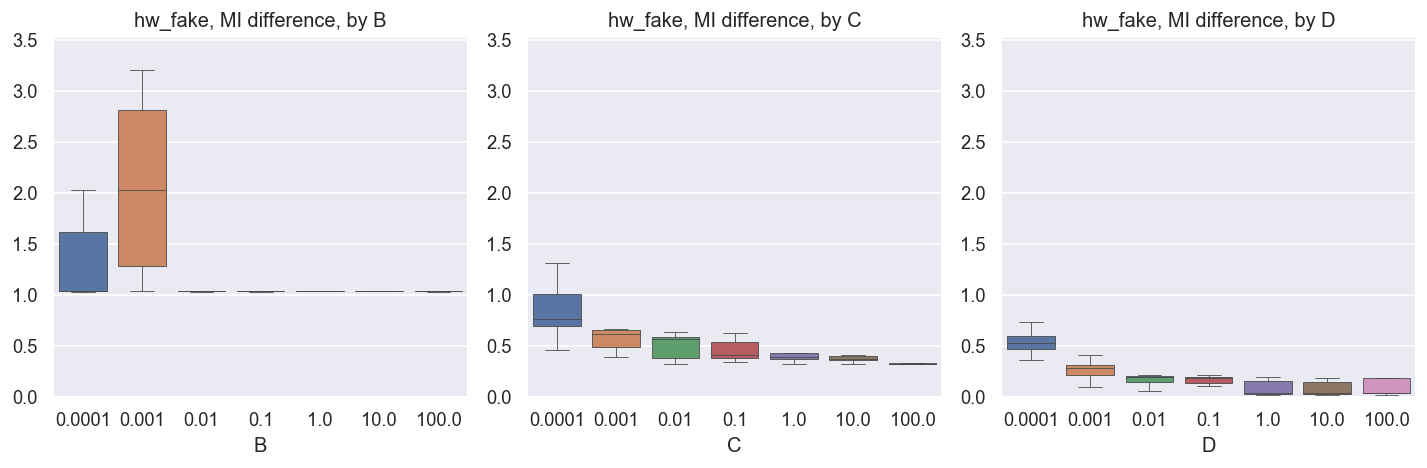

In [38]:
fake_mi_diff = df_goal_3[(df_goal_3['dataset']=='hw_fake')&(df_goal_3['measure']=='MI difference')]
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=120)
maximum = fake_mi_diff['value'].max() * 1.1
sns.boxplot(x='epsilon', y='value', data=fake_mi_diff[fake_mi_diff['parameter settings']=='B'], ax=axes[0], linewidth=0.5, fliersize=0)
sns.boxplot(x='epsilon', y='value', data=fake_mi_diff[fake_mi_diff['parameter settings']=='C'], ax=axes[1], linewidth=0.5, fliersize=0)
sns.boxplot(x='epsilon', y='value', data=fake_mi_diff[fake_mi_diff['parameter settings']=='D'], ax=axes[2], linewidth=0.5, fliersize=0)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('B')
axes[1].set_xlabel('C')
axes[2].set_xlabel('D')
axes[0].set_title('hw_fake, MI difference, by B')
axes[1].set_title('hw_fake, MI difference, by C')
axes[2].set_title('hw_fake, MI difference, by D')
axes[0].set_ylim(0, maximum)
axes[1].set_ylim(0, maximum)
axes[2].set_ylim(0, maximum)
plt.tight_layout()

# Appendix

In [39]:
# from numpy.random import randint as np_randint
# from random import random

# domain_size = 3
# num_tuples = 1000
# p = 0.5

# df = pd.DataFrame()
# df['parent_1'] = np_randint(0, domain_size, size=num_tuples)
# df['parent_2'] = np_randint(0, domain_size, size=num_tuples)
# df['child_1'] = [df.loc[i, 'parent_1'] if random() < p else df.loc[i, 'parent_2'] for i in df.index]
# df['child_2'] = [df.loc[i, 'parent_1'] if random() > p else df.loc[i, 'parent_2'] for i in df.index]

# df.to_csv('./data/hw_fake.csv', index=False)